### Importar Imagenes

In [0]:
import skimage.io as io
imagen=io.imread(fname="ducks01_0100.jpg")

### Funciones para mostrar imagenes

In [0]:
import matplotlib.pyplot as plt
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen)
    plt.show()    
def mostrar_imagen_bn(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen,cmap='gray')
    plt.show()

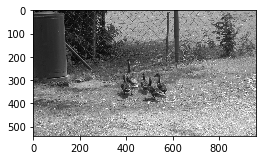

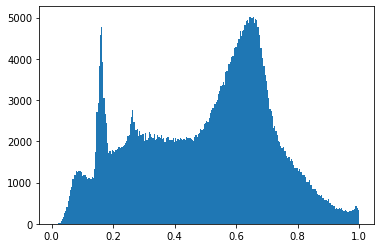

In [179]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
imagen_blanco_negro=rgb2gray(imagen)
mostrar_imagen_bn(imagen_blanco_negro)
plt.hist(imagen_blanco_negro.ravel(),bins=255)
plt.show()

In [0]:
from skimage.filters import gaussian
from scipy import ndimage, misc
from sklearn.feature_extraction import image
minx=370
maxx=580
miny=210
maxy=390
imagen_segmento_color=imagen[miny:maxy,minx:maxx]

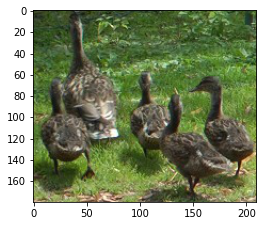

AttributeError: ignored

In [7]:
import skimage.exposure as skie
mostrar_imagen(imagen_segmento_color)
imagen_gray = rgb2gray(image)
img_tmp=skie.rescale_intensity(imagen_gray, in_range=(0.25, .35), out_range=(0, 1))
mostrar_imagen_bn(img_tmp)
image_m=imagen_gray.copy()
mostrar_imagen(image_mt)
imagen_filtro_gaus=gaussian(image_mt,2)
mostrar_imagen_bn(imagen_filtro_gaus)

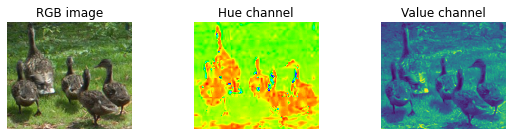

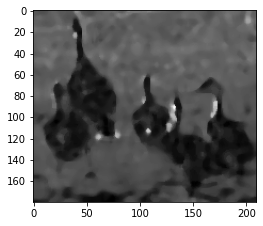

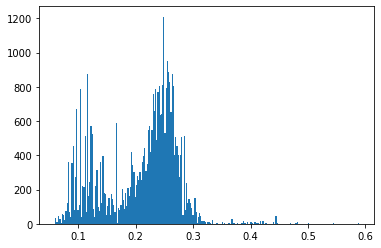

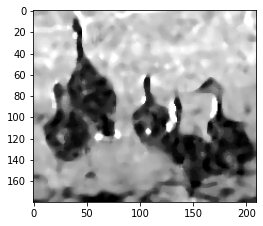

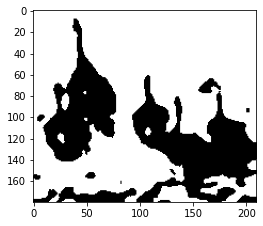

In [8]:
from skimage.color import rgb2hsv
import skimage.filters as skfilt
rgb_img = imagen_segmento_color
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
med_denoised = ndimage.median_filter(hue_img, 6)
mostrar_imagen_bn(med_denoised)
plt.hist(med_denoised.ravel(),bins=255)
img_tmp=skie.rescale_intensity(med_denoised, in_range=(0.08, .30), out_range=(0, 1))
mostrar_imagen_bn(img_tmp)
thresh =  skfilt.threshold_otsu(img_tmp)
binary = img_tmp > thresh
mostrar_imagen_bn(binary)

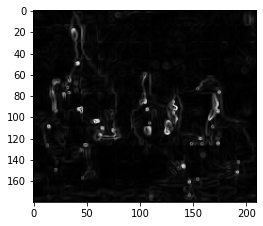

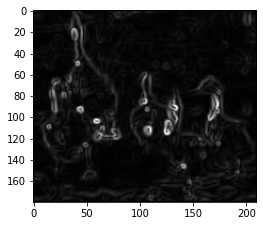

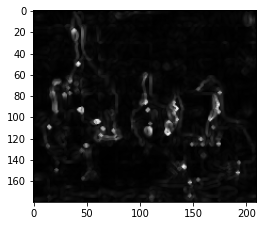

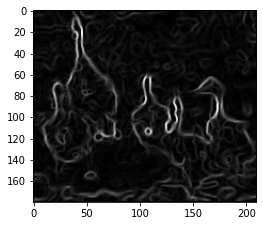

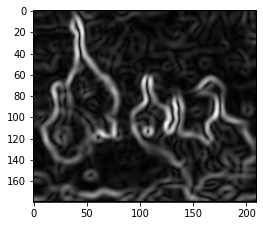

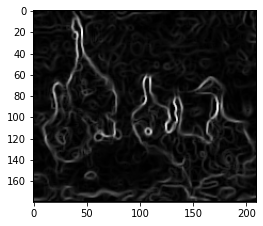

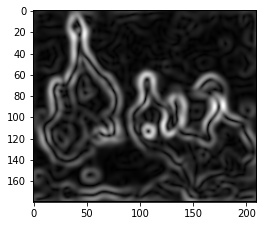

In [9]:
import skimage.feature as feature
sobel = skfilt.sobel(hue_img)
mostrar_imagen_bn(sobel)
sobel_gauss=skfilt.sobel(gaussian(hue_img,1))
mostrar_imagen_bn(sobel_gauss)
med_dsob = ndimage.median_filter(sobel, 2)
mostrar_imagen_bn(med_dsob)



sobel = skfilt.sobel(img_tmp)
mostrar_imagen_bn(sobel)
sobel_gauss=skfilt.sobel(gaussian(img_tmp,2))
mostrar_imagen_bn(sobel_gauss)

prewitt = skfilt.prewitt(img_tmp)
mostrar_imagen_bn(prewitt)
sobel_gauss=skfilt.sobel(gaussian(prewitt,3))
mostrar_imagen_bn(sobel_gauss)


In [11]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img_tmp, figsize=(10, 8), verbose=False)
plt.show()

NameError: ignored

In [12]:
import skimage.filters as skfilt
from skimage.measure import label
from skimage.measure import regionprops
thresh_val = skfilt.threshold_otsu(imagen_filtro_gaus)
display(thresh_val)
new_mask = imagen_filtro_gaus > thresh_val
object_labels = label(new_mask)
display(object_labels)
some_props = regionprops(object_labels)
areas = [p.area for p in some_props]
areas_total= [ (object_labels == l).sum() 
         for l in range(1, object_labels.max()+1) ] 
mostrar_imagen_bn(new_mask)

NameError: ignored

In [13]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2*np.random.randn(*img.shape)
# Convert the image into a graph with the value of the gradient on
# the edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependant from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels
mostrar_imagen(img)
mostrar_imagen(label_im)

NameError: ignored

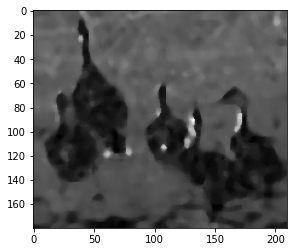

In [16]:
med_denoised
plt.imshow(med_denoised, cmap='gray')

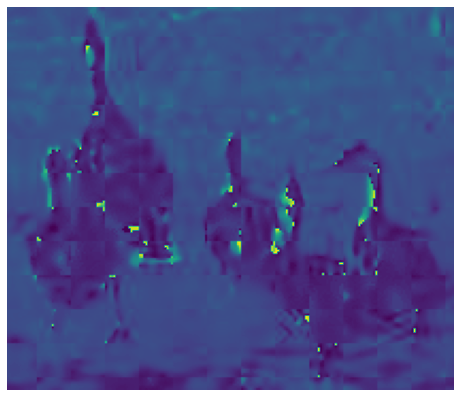

In [33]:
#I = med_denoised
I = hue_img
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

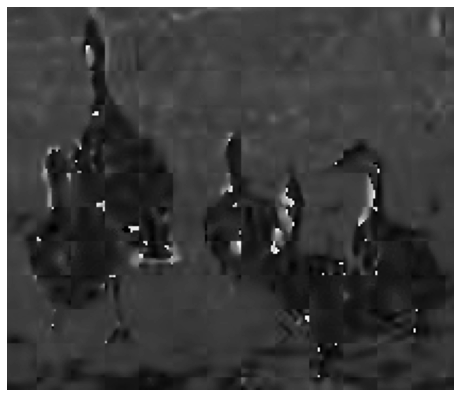

In [34]:
import numpy as np
I1 = I
I2 = np.asarray(I1,dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [0]:
X = I2.reshape((-1, 1))

In [138]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

In [0]:
I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape

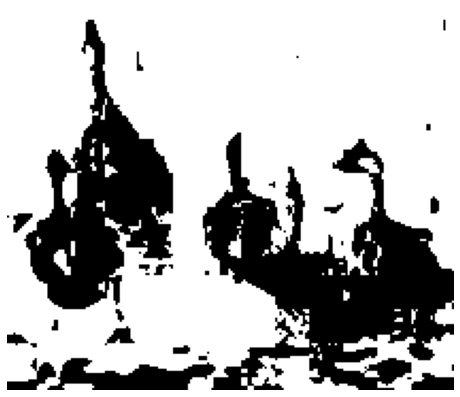

In [141]:
plt.figure(figsize=(8,8))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()

(array([11821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

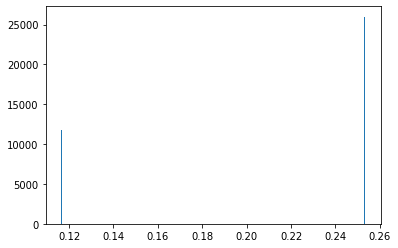

In [142]:
plt.hist(I2_compressed.ravel(), bins = 255)

In [0]:
I_T = I2_compressed.copy()

In [0]:
I_T[I_T >= 0.74] = 0
I_T[I_T < 0.1] = 0


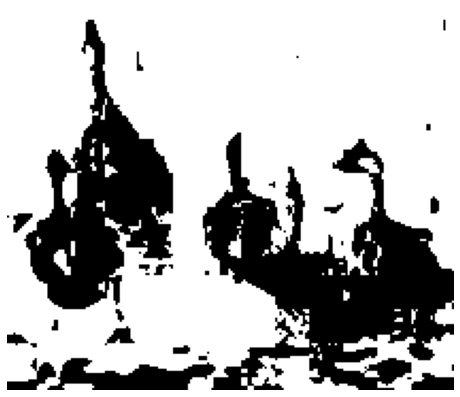

In [145]:
plt.figure(figsize=(8,8))
plt.imshow(I_T,cmap='gray')
plt.axis('off')
plt.show()

In [67]:
I_T.shape

(180, 210)

In [0]:
import pandas as pd

In [0]:
data = pd.DataFrame(I_T)

In [133]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.246658,0.247419,0.247419,0.242090,0.240567,0.241328,0.242090,0.243612,0.244374,0.242090,0.241328,0.234476,0.229908,0.227624,0.230669,0.226862,0.224578,0.223056,0.223056,0.212397,0.207829,0.199454,0.193363,0.197931,0.200215,0.198692,0.204022,0.210113,0.207829,0.208590,0.213158,0.207829,0.196408,0.187272,0.188033,0.181181,0.177374,0.174329,0.174329,0.174329,...,0.198692,0.190317,0.185749,0.184988,0.188795,0.185749,0.184988,0.199454,0.200976,0.200976,0.199454,0.200976,0.206306,0.208590,0.207829,0.207067,0.206306,0.209351,0.208590,0.205545,0.213158,0.210113,0.204783,0.203260,0.204022,0.202499,0.202499,0.199454,0.203260,0.206306,0.210874,0.216965,0.222294,0.227624,0.229908,0.226862,0.233715,0.233715,0.232953,0.229908
std,0.029951,0.028321,0.028321,0.037983,0.040190,0.039109,0.037983,0.035574,0.034280,0.037983,0.039109,0.047526,0.051889,0.053791,0.051216,0.054390,0.056083,0.057134,0.057134,0.062977,0.064783,0.067165,0.068198,0.067476,0.066995,0.067325,0.066009,0.063927,0.064783,0.064508,0.062638,0.064783,0.067752,0.068675,0.068645,0.068607,0.068288,0.067877,0.067877,0.067877,...,0.067325,0.068505,0.068709,0.068713,0.068607,0.068709,0.068713,0.067165,0.066816,0.066816,0.067165,0.066816,0.065303,0.064508,0.064783,0.065048,0.065303,0.064223,0.064508,0.065548,0.062638,0.063927,0.065783,0.066225,0.066009,0.066432,0.066432,0.067165,0.066225,0.065303,0.063621,0.060772,0.057636,0.053791,0.051889,0.054390,0.048311,0.048311,0.049071,0.051889
min,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,...,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466
25%,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.253510,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,...,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.116466,0.1

In [0]:
import cv2

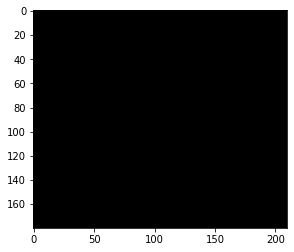

In [135]:
mitad, imagen = cv2.threshold(I_T, 255/2, 255, cv2.THRESH_BINARY_INV)
plt.imshow(imagen, cmap='gray')

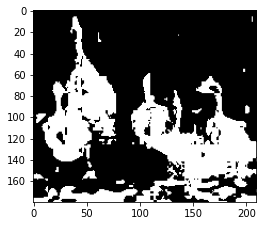

In [146]:
import skimage.filters as skfilt
thresh =  skfilt.threshold_otsu(I_T)
binary = I_T > thresh
binary_neg = ~binary
mostrar_imagen_bn(binary_neg)